# Torah scraping

### Looking for hidden patterns.
### and not so hidden patterns.
### 2020-4-21
### Joe Hostyk and Alex Zaloum

In [19]:
import csv
from IPython.display import display, clear_output
import os
import itertools
from collections import Counter

import matplotlib
# matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

import spacy
import re

In [6]:
GMATRIA = {"א": 1, "ב": 2, "ג": 3, "ד": 4, "ה": 5, "ו": 6, "ז": 7, "ח": 8, "ט": 9, "י": 10, "כ": 20, "ך": 20, "ל": 30, "מ": 40, "ם": 40, "נ": 50, "ן": 50, "ס": 60, "ע": 70, "פ": 80, "ף": 80, "צ": 90, "ץ": 90, "ק": 100, "ר": 200, "ש": 300, "ת": 400}
ALEPH_BEIS = GMATRIA.keys()

In [7]:
## todo: sofit letters
## Define the otiyot categories
## Different breakdowns?

### Load texts

In [8]:
def getFileNames(folder):
    """
    Get all our file names for processing later.
    Currently, doesn't recursively search.

    Args:
        folder (str): Full path to the folder.

    Returns:
        filenames (list of strings)
    """

    print ("Getting filenames...")

    filenames = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if ".txt" in file:
                filenames.append(os.path.join(root, file))
    return filenames

def makeWordDictionaryFromSefer(filename):
    
    seferWords = Counter()
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    seferWords[word] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return seferWords


def makeLetterDictionaryFromSefer(filename, allLetters):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letter in word:
                        allLetters[letter] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allLetters  

def makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram):
    
    with open(filename, "r") as psukim:
        for pasuk in psukim:

            cleanedPasuk = pasuk.strip().replace("־", " ").replace("[", "").replace("]", "")
            splitPasuk = cleanedPasuk.split(" ")

            # Skip the non-text lines.
            if len(splitPasuk) == 1 or splitPasuk[0] == "Chapter":
                continue

            for word in splitPasuk:
                try:
                    for letterIndex in range(len(word) - sizeOfngram + 1):
    
                        ngram = word[letterIndex:letterIndex + sizeOfngram]
                        allNgrams[ngram] += 1
                except KeyError as e:
                    problematicWords.add(word)
    return allNgrams  

def getAllFiles(filenames):
    
    allWords = {}
    allLetters = Counter()
    allNgrams = Counter()
    
    for filename in filenames:
        
        seferName = filename.replace(".txt", "").split("/")[-1]
        print(seferName)
#         allWords[seferName] = makeDictionaryFromSefer(filename)
#         allLetters = makeLetterDictionaryFromSefer(filename, allLetters)
        allNgrams = makeNgramsDictionaryFromSefer(filename, allNgrams, sizeOfngram = 2)

#         raise
    return allNgrams
        
     

In [2]:
folder = "./texts"
filenames = getFileNames(folder)
# allWords = getAllFiles(filenames)
# allLetters = getAllFiles(filenames)
allNgrams = getAllFiles(filenames)

### Check which pairs never show up in the Torah

In [69]:
allPossiblePairs = list(itertools.product(ALEPH_BEIS, ALEPH_BEIS))
allPossiblePairs = ["".join(pair) for pair in allPossiblePairs]
# allPossiblePairs

In [70]:
print([pair for pair in allPossiblePairs if pair not in allNgrams])

['בף', 'גט', 'גכ', 'גס', 'גצ', 'גץ', 'גק', 'דז', 'דט', 'דס', 'דצ', 'דץ', 'הף', 'הץ', 'זט', 'זס', 'זף', 'זצ', 'זץ', 'זש', 'חא', 'חע', 'טג', 'טז', 'טכ', 'טס', 'טצ', 'טץ', 'טק', 'כץ', 'ךא', 'ךב', 'ךג', 'ךד', 'ךה', 'ךו', 'ךז', 'ךח', 'ךט', 'ךי', 'ךכ', 'ךך', 'ךל', 'ךמ', 'ךם', 'ךנ', 'ךן', 'ךס', 'ךע', 'ךפ', 'ךף', 'ךצ', 'ךץ', 'ךק', 'ךר', 'ךש', 'ךת', 'מף', 'םא', 'םב', 'םג', 'םד', 'םה', 'םו', 'םז', 'םח', 'םט', 'םי', 'םכ', 'םך', 'םל', 'םמ', 'םם', 'םנ', 'םן', 'םס', 'םע', 'םפ', 'םף', 'םצ', 'םץ', 'םק', 'םר', 'םש', 'םת', 'ןא', 'ןב', 'ןג', 'ןד', 'ןה', 'ןו', 'ןז', 'ןח', 'ןט', 'ןי', 'ןכ', 'ןך', 'ןל', 'ןמ', 'ןם', 'ןנ', 'ןן', 'ןס', 'ןע', 'ןפ', 'ןף', 'ןצ', 'ןץ', 'ןק', 'ןר', 'ןש', 'ןת', 'סז', 'סט', 'סצ', 'סץ', 'סש', 'עח', 'עע', 'עף', 'פב', 'פפ', 'ףא', 'ףב', 'ףג', 'ףד', 'ףה', 'ףו', 'ףז', 'ףח', 'ףט', 'ףי', 'ףכ', 'ףך', 'ףל', 'ףמ', 'ףם', 'ףנ', 'ףן', 'ףס', 'ףע', 'ףפ', 'ףף', 'ףצ', 'ףץ', 'ףק', 'ףר', 'ףש', 'ףת', 'צז', 'צס', 'צש', 'ץא', 'ץב', 'ץג', 'ץד', 'ץה', 'ץו', 'ץז', 'ץח', 'ץט', 'ץי', 'ץכ', 'ץך', 'ץל', 'ץמ', 'ץם

### What are the most common pairs in the Torah?

In [71]:
allNgrams.most_common(5)

[('את', 5543), ('וי', 4352), ('אל', 4090), ('ים', 3970), ('יה', 3734)]

In [72]:
### Most common:
allNgrams.most_common(575)

### Least common:
allNgrams.most_common(575)[-30:]

[('טד', 5),
 ('סס', 5),
 ('קא', 4),
 ('כט', 4),
 ('קף', 4),
 ('זם', 4),
 ('חף', 3),
 ('א\u200d', 3),
 ('\u200dש', 3),
 ('זך', 3),
 ('שף', 3),
 ('עס', 3),
 ('זח', 3),
 ('קק', 3),
 ('אט', 3),
 ('פמ', 3),
 ('נץ', 2),
 ('תץ', 2),
 ('לץ', 2),
 ('פף', 2),
 ('זפ', 2),
 ('צץ', 2),
 ('טט', 1),
 ('אץ', 1),
 ('סן', 1),
 ('אא', 1),
 ('צט', 1),
 ('קכ', 1),
 ('הך', 1),
 ('זג', 1)]

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([    3,    70,    70,   830,  1035,  1806,  1836,  2111,  2199,
         2937,  3358,  3976,  4260,  4700,  7039,  7194,  8614,  9889,
        10630, 11270, 14474, 15605, 16357, 17965, 18147, 21583, 27069,
        28085, 30596, 31607]),
 <a list of 29 Patch objects>)

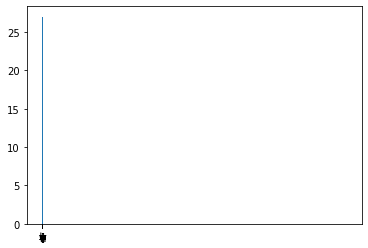

In [73]:
sortedLetters = {k: v for k, v in sorted(allLetters.items(), key=lambda item: item[1])}

plt.hist(list(sortedLetters.keys()), list(sortedLetters.values()))

### Heatmap

In [ ]:
### Todo: make a heatmap of 24x24 letters


### Get gmatrias:

In [4]:
def gmatrifyAword(word):
    """
    Get the gmatria for one word. Doesn't catch punctuation/errors.

    Args:
        word (str)

    Returns:
        The gmatria (int)

    """

    return sum([GMATRIA[letter] for letter in word])

# Numbers, to words with that gmatria

def getGmatrias():
    
    gmatriasToWords = {}

    directory = "./texts/"

    if not os.path.exists(directory):
        os.mkdir("./texts")
    
    pathToGmatriaFile = "{}bamidbarGmatriaByNumber.tsv".format(directory)

    if os.path.exists(pathToGmatriaFile):
        print ("Gmatria file exists. Reading...")
        reader = csv.reader(open(pathToGmatriaFile), delimiter = "\t")
        header = next(reader)
        for line in reader:
            line = dict(zip(header, line))
            word = int(line["Gmatria"])
            shifts = set(line["Word"].split(" | "))
            gmatriasToWords[word] = shifts
        print ("Finished reading.")
    ### To-do: fill this in later
#     else:
#         print ("Gmatria file does not exist. Creating...")
#         with open(pathToGmatriaFile, "w") as out:

#             out.write("Gmatria\tWord\n")

#             
    return gmatriasToWords

In [5]:
gmatriasToWords = getGmatrias()
gmatriasToWords[220]

Gmatria file exists. Reading...
Finished reading.


{'הארדי', 'וטהר', 'וידר', 'וירד', 'ורוח', 'טהור', 'יבחר', 'צפים', 'רוחו'}

## Unique words

In [13]:
folder = "texts/Torah"
filenames = getFileNames(folder)

sfarimToWords = {}
for filename in filenames:
    
    seferName = filename.replace(".txt", "").split("/")[-1]
    print(seferName)
    wordsInSefer = makeWordDictionaryFromSefer(filename)
    sfarimToWords[seferName] = wordsInSefer

Getting filenames...
vayikra
dvarim
breishit
shmot
bamidbar


In [24]:
sfarim = set(sfarimToWords)
combos = itertools.combinations(sfarim, 2)
for sefer1, sefer2 in combos:

    sefer1words = set(sfarimToWords[sefer1])
    sefer2words = set(sfarimToWords[sefer2])

#     print ("{} has {} words.".format(sefer1, len(sefer1words)))
#     print ("{} has {} words.".format(sefer2, len(sefer2words)))
    print ("{} and {} share {} words.".format(sefer1, sefer2, len(sefer1words.intersection(sefer2words))))
#     print ("{} has {} unique words.".format(sefer1, len(sefer1words.difference(sefer2words))))
#     print ("{} has {} unique words.".format(sefer2, len(sefer2words.difference(sefer1words))))


bamidbar has 3847 words.
bamidbar and dvarim share 1201 words.
bamidbar has 3847 words.
bamidbar and shmot share 1412 words.
bamidbar has 3847 words.
bamidbar and vayikra share 973 words.
bamidbar has 3847 words.
bamidbar and breishit share 1323 words.
dvarim has 4089 words.
dvarim and shmot share 1302 words.
dvarim has 4089 words.
dvarim and vayikra share 858 words.
dvarim has 4089 words.
dvarim and breishit share 1313 words.
shmot has 4171 words.
shmot and vayikra share 1007 words.
shmot has 4171 words.
shmot and breishit share 1482 words.
vayikra has 2710 words.
vayikra and breishit share 860 words.


### Basic histogram/breakdowns:
    
#### Letters, pairs of letters

In [ ]:
allWords
for 

### LDA:

# Talmud

In [9]:
## Load:
folder = "texts/Talmud"
filenames = getFileNames(folder)
print ("There are {} masechtot.".format(len(filenames)))

Getting filenames...
There are 37 masechtot.


In [10]:
manualRabbis = set(["Hillel", "Rabbi Akiva", "Rabbi Ami", "Rabbi Shimon", "Shammai", "The Sages", "Abba Shaul", "Rabbi Yannai", "Rabbi Yehuda ben Agra", "Rav Ashi", "Rabbi Elazar, son of Rabbi Tzadok", "Rabbi Shimon ben Lakish", "Reish Lakish", "Rav Naḥman bar Yitzḥak", "Beit Hillel", "Rabbi Ḥanina", "Rabbi Yehuda", "Rabbi Elazar ben Azarya", "Rav Dimi", "Rabbi Shimon ben Elazar", "Rav Yosef", "Rav Huna bar Taḥlifa", "Rabbi Yishmael, son of Rabbi Yosei", "Rav Pappa", "Rabbi Abbahu", "Rabbi Yirmeya", "Rav Aḥa, son of Rava", "Rabbi Yitzḥak, son of Rabbi Bisna", "Rabbi Ḥanina ben Gamliel", "Rav Huna, son of Rav Natan", "Rabbi Yoḥanan", "Rava", "Rav Naḥman", "Beit Shammai", "Rabbi Yosei", "Rav Sheshet", "Rav Ḥiyya, son of Rav Huna", "Rabbi Eliezer", "Rav Ḥinnana bar Shelamya", "Rav Aḥa, son of Rav Yosef", "Rav Adda", "Rabban Gamliel", "Rabbi Neḥemya", "Rav Ḥanilai", "Rabbi Yehuda ben Bava", "Rabbi Abba bar Memel", "Rav Ḥanan from Neharde’a", "Rabbi Eliezer, son of Rabbi Tzadok", "Rav Huna, son of Rav Yehoshua", "Rabbi Yosei ben Keifar", "Shmuel", "Levi", "Rabbi Eliezer ben Ya’akov", "Rav Shimi bar Ḥiyya", "Rav Pineḥas", "Rav Shemaya", "Rabbi Amram", "Rav Huna", "Rav Ḥanina bar Shelamya", "Abaye", "Rav Aḥa, son of Rav Yeiva", "Rabbi Meir", "Rabbi Zeira", "Rabbi Yehoshua ben Levi", "Rabbi Yoḥanan ben Nuri", "Ameimar", "Rabbi Ḥanina ben Antigonus", "Rav Yehuda of Diskarta", "Rabbi Yehoshua", "Rav Shmuel bar Yeiva", "Rabbi Natan bar Yosef", "Rav Kahana", "Rav Huna bar Ḥiyya", "Rabbi Elazar", "Rabbi Yehoshua ben Ḥananya", "Ze’eiri", "Ami of Vardina", "Rav Yitzḥak, son of Rav Yehuda", "Rabba bar bar Ḥana", "Rabba bar bar Ḥana", "Rabbi Yishmael", "Ḥasa", "Ḥizkiya", "Ravin", "Rav Giddel", "Ḥananya ben Ḥizkiya", "Aḥer", "Rav Ḥiyya bar Abba", "Yosei ben Yo’ezer", "Yosef ben Yoḥanan", "Yehoshua ben Peraḥya", "Nitai HaArbeli", "Yehuda ben Tabbai", "Shimon ben Shataḥ", "Shemaya", "Avtalyon", "Rabbi Ila", "Rabbi Asi", "Rabbi Ḥiyya bar Abba", "Rav Sheizevi", "Rav Pinḥas", "Rabbi Musya, grandson of Rabbi Masya", "Rav Ḥisda", "Rav Shimi from Neharde’a", "Rav Yitzḥak", "Rabbi Sheila", "Rabban Yoḥanan ben Zakkai", "Isi ben Akiva", "Isi ben Yehuda", "Yosef of Hutzal", "Rav Mordekhai", "Rabbi Yoshiya", "Rav Ḥisda", "Rav Zutra bar Toviya", "Mar Zutra", "Rav Mattana", "Rav Yehuda", "Rabbi Abba", "Hanani", "Rabba bar Lima", "Rav Aḥa bar Ya’akov", "Rabba bar Avuh", "Rabbi Natan"])



In [43]:
nlp = spacy.load('en_core_web_sm')
lineNumber = 0
people = set()
for filename in filenames:
    
    print (filename)
    weirdDelimiter = "@"
    reader = open(filename, "r")
    for line in reader:
        

        ### 1. Get sections with rabbis in them:

        ### Whitespace/daf numbers. Translations have "<" in them
        
#         if "<" in line:
            
#             splitLine = line.split("<b>")
#             for chunk in splitLine:
#                 if ("Rabbi" in chunk or "Rav" in chunk) and "Rabbis" not in chunk:
#                     print (chunk)
            
        ### 2. Try it by verb:
        
#         splitLineByPhrase = line.split("<b>")
#         for phrase in splitLineByPhrase:
            
#             gotTheseRabbisAlready = False
            
            
#             ### Skip ones we've found? Manual way
#             ### Problems: If "y" is in the list, then "x ben y" will get skipped and we won't find him.
#             ### Same with "Rav" and "Rabba" in general.
#             for rabbi in manualRabbis:
#                 if rabbi in phrase:
#                     gotTheseRabbisAlready = True
        
#             if gotTheseRabbisAlready:
#                 continue
                
            
#             splitLine = phrase.split(" ")
#             verbs = ["says", "holds", "applied", "said"]
#             for verb in verbs:
#                 try:
#                     verbIndex = splitLine.index(verb)
#                     # By default, just start from the beginning of the line
#                     rabbiIndex = 0
#                     # But if "Rabbi" is in the line, start from that word
#                     for rabbiWord in ["Rabbi", "Rav"]:

#                         if rabbiWord in splitLine:
#                             rabbiIndex = splitLine.index(rabbiWord)
# #                     if not rabbiIndex:
# #                         print ("Rabbi word not in line")


#                     chunkContainingRabbi = splitLine[rabbiIndex : verbIndex]
                    
#                     ### Problem: Some times the rabbi's name is in the previous phrase,
#                     ### and the new phrase starts with "said". For now, skip.                    
#                     if chunkContainingRabbi == ["said"]:
#                         continue
                    
#                     ### Skip ones that are generic pronouns
#                     pronouns = ["he", "she", "i", "they"]
#                     precedingWordIsNotPronoun = True
#                     for pronoun in pronouns:
#                         if splitLine[verbIndex - 1].lower() in pronouns:
#                             precedingWordIsPronoun = False
#                     if precedingWordIsNotPronoun and len(chunkContainingRabbi) > 1:
#                         print (" ".join(chunkContainingRabbi))
#                 # If the verb isn't in the line.
#                 except ValueError as e:
#                     continue


        ### 3. NLP
    
        ### Skip the header info, and the whitespace/daf numbers
        lineNumber += 1
        if lineNumber < 21 or len(line) < 13:
            continue
#         print ("\rLine number {}.\r".format(lineNumber))
        line = re.sub('<[^<]+?>', '', line) # ayy https://stackoverflow.com/a/4869782
        doc = nlp(line)
        
        ### This won't separate multi-word names
#         for token in doc:
#             if token.pos_ == "PROPN":
#                 properNouns.add(token)
                
        for ent in doc.ents:
            if ent.label_ == "PERSON":
                people.add(ent)


texts/Talmud/Niddah/English/merged.txt
texts/Talmud/SederMoed/Chagigah/English/merged.txt
texts/Talmud/SederMoed/Yoma/English/merged.txt
texts/Talmud/SederMoed/Rosh Hashanah/English/merged.txt
texts/Talmud/SederMoed/Moed Katan/English/merged.txt
texts/Talmud/SederMoed/Beitzah/English/merged.txt
texts/Talmud/SederMoed/Sukkah/English/merged.txt
texts/Talmud/SederMoed/Megillah/English/merged.txt
texts/Talmud/SederMoed/Taanit/English/merged.txt
texts/Talmud/SederMoed/Pesachim/English/merged.txt
texts/Talmud/SederMoed/Shabbat/English/merged.txt
texts/Talmud/SederMoed/Eruvin/English/merged.txt
texts/Talmud/Berakhot/English/merged.txt
texts/Talmud/SederNezikin/Horayot/English/merged.txt
texts/Talmud/SederNezikin/Avodah Zarah/English/merged.txt
texts/Talmud/SederNezikin/Bava Batra/English/merged.txt
texts/Talmud/SederNezikin/Shevuot/English/merged.txt
texts/Talmud/SederNezikin/Sanhedrin/English/merged.txt
texts/Talmud/SederNezikin/Bava Metzia/English/merged.txt
texts/Talmud/SederNezikin/Bava K

In [44]:
peopleToText = {name.text for name in people}
with open("talmudPeople.txt", "w") as out:
    out.write("\n".join(peopleToText))